<a href="https://colab.research.google.com/github/TheRealKraytonian/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Kraytonian_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
attribute_info = ['age_of_patient', 'operation_year', 'number_of_positive_axillary_nodes_detected', 'survival_status']

In [0]:
haberman = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', 
                       header=None,
                      names=attribute_info)
haberman.sample(20).sort_index()

,age_of_patient,operation_year,number_of_positive_axillary_nodes_detected,survival_status
14,35,64,13,1
27,38,60,0,1
39,39,63,4,1
76,44,61,0,1
91,46,62,5,2
95,46,63,0,1
110,48,61,8,1
113,48,66,0,1
118,49,66,0,1
123,49,67,1,1


In [0]:
haberman.shape

(306, 4)

In [0]:
print(haberman.shape)
haberman['age_of_patient'].isnull().sum()
haberman['operation_year'].isnull().sum()
haberman['number_of_positive_axillary_nodes_detected'].isnull().sum()
haberman['survival_status'].isnull().sum()

(306, 4)


0

In [0]:
haberman['age_of_patient'].isnull().sum()

0

In [0]:
haberman['operation_year'].isnull().sum()

0

In [0]:
haberman['number_of_positive_axillary_nodes_detected'].isnull().sum()

0

In [0]:
haberman['survival_status'].isnull().sum()

0

In [0]:
haberman['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [0]:
haberman.sample(5)

,age_of_patient,operation_year,number_of_positive_axillary_nodes_detected,survival_status
286,70,58,4,2
171,54,59,7,1
64,43,64,0,2
227,60,61,25,1
67,43,64,2,1


In [0]:
haberman['nsurvival_status'] = haberman['survival_status'].map({2:0, 1:1})

In [0]:
 haberman['nsurvival_status'].value_counts()

1    225
0     81
Name: nsurvival_status, dtype: int64

In [0]:
haberman['number_of_positive_axillary_nodes_detected'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      3
2      0
3      2
4      4
      ..
301    1
302    0
303    3
304    1
305    2
Name: number_of_positive_axillary_nodes_detected, Length: 306, dtype: int64>

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
# TODO

In [0]:
pd.crosstab(haberman['age_of_patient'], haberman['nsurvival_status'], normalize='index', margins=True)
pd.crosstab(haberman['age_of_patient'], haberman['nsurvival_status'], normalize='columns', margins=True)

nsurvival_status,0,1,All
age_of_patient,,,
30,0.000000,0.013333,0.009804
31,0.000000,0.008889,0.006536
33,0.000000,0.008889,0.006536
34,0.024691,0.022222,0.022876
35,0.000000,0.008889,0.006536
36,0.000000,0.008889,0.006536
37,0.000000,0.026667,0.019608
38,0.012346,0.040000,0.032680
39,0.012346,0.022222,0.019608


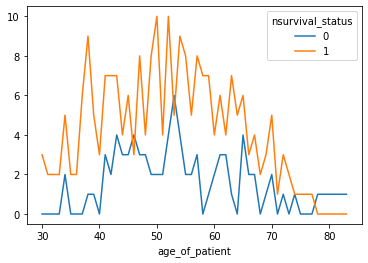

In [0]:
haberman_age = pd.crosstab(haberman['age_of_patient'], haberman['nsurvival_status'])
haberman_age.plot();

In [0]:
pd.crosstab(haberman['operation_year'], haberman['nsurvival_status'], normalize='index', margins=True)
pd.crosstab(haberman['operation_year'], haberman['nsurvival_status'], normalize='columns', margins=True)

nsurvival_status,0,1,All
operation_year,,,
58,0.148148,0.106667,0.117647
59,0.111111,0.080000,0.088235
60,0.049383,0.106667,0.091503
61,0.037037,0.102222,0.084967
62,0.086420,0.071111,0.075163
63,0.098765,0.097778,0.098039
64,0.098765,0.102222,0.101307
65,0.160494,0.066667,0.091503
66,0.074074,0.097778,0.091503


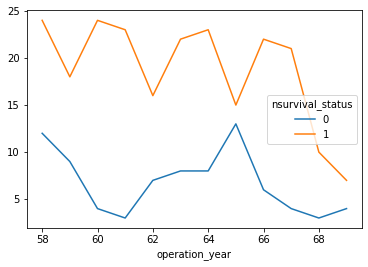

In [0]:
haberman_oy = pd.crosstab(haberman['operation_year'], haberman['nsurvival_status'])
haberman_oy.plot();

In [0]:
pd.crosstab(haberman['number_of_positive_axillary_nodes_detected'], haberman['nsurvival_status'], normalize='index', margins=True)
pd.crosstab(haberman['number_of_positive_axillary_nodes_detected'], haberman['nsurvival_status'], normalize='columns', margins=True)

nsurvival_status,0,1,All
number_of_positive_axillary_nodes_detected,,,
0,0.234568,0.520000,0.444444
1,0.098765,0.146667,0.133987
2,0.061728,0.066667,0.065359
3,0.086420,0.057778,0.065359
4,0.037037,0.044444,0.042484
5,0.049383,0.008889,0.019608
6,0.037037,0.017778,0.022876
7,0.024691,0.022222,0.022876
8,0.024691,0.022222,0.022876


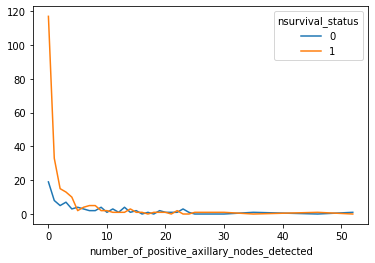

In [0]:
haberman_nd = pd.crosstab(haberman['number_of_positive_axillary_nodes_detected'], haberman['nsurvival_status'])
haberman_nd.plot();

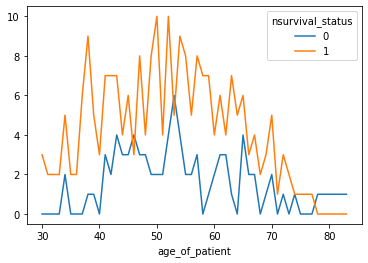

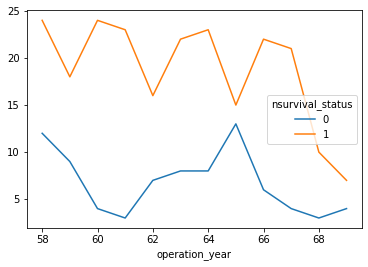

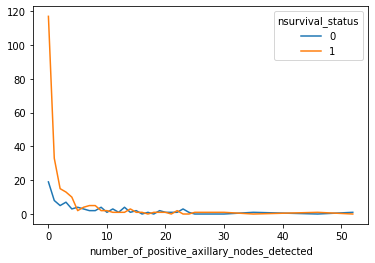

In [0]:
haberman_age.plot(); haberman_oy.plot(); haberman_nd.plot(); 

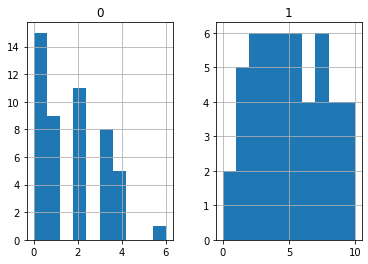

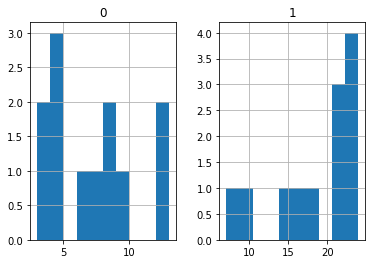

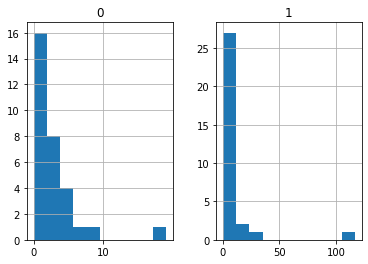

In [0]:
haberman_age.hist(); haberman_oy.hist(); haberman_nd.hist(); 

In [0]:
pd.crosstab(haberman['nsurvival_status'], haberman['number_of_positive_axillary_nodes_detected'], normalize='index', margins=True)
pd.crosstab(haberman['nsurvival_status'], haberman['number_of_positive_axillary_nodes_detected'], normalize='columns', margins=True)

number_of_positive_axillary_nodes_detected,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,30,35,46,52,All
nsurvival_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.139706,0.195122,0.25,0.35,0.230769,0.666667,0.428571,0.285714,0.285714,0.666667,0.333333,0.75,0.5,0.8,0.25,0.666667,0.0,1.0,0.0,0.666667,0.5,1.0,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.264706
1,0.860294,0.804878,0.75,0.65,0.769231,0.333333,0.571429,0.714286,0.714286,0.333333,0.666667,0.25,0.5,0.2,0.75,0.333333,1.0,0.0,1.0,0.333333,0.5,0.0,0.666667,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.735294


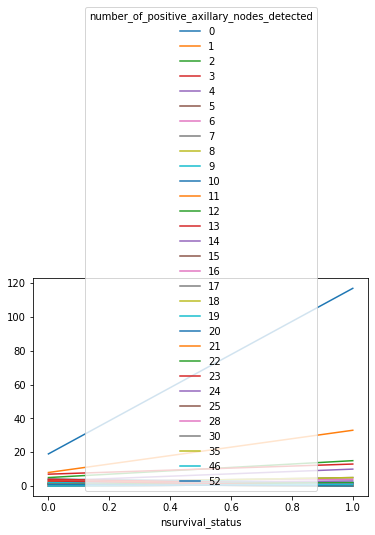

In [0]:
shaberman_nd = pd.crosstab(haberman['nsurvival_status'], haberman['number_of_positive_axillary_nodes_detected'])
shaberman_nd.plot();


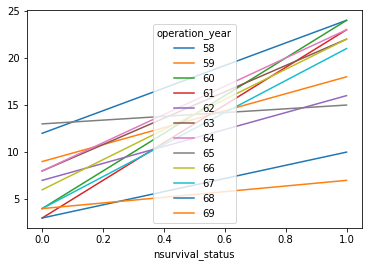

In [0]:
shaberman_oy = pd.crosstab(haberman['nsurvival_status'], haberman['operation_year'])
shaberman_oy.plot();

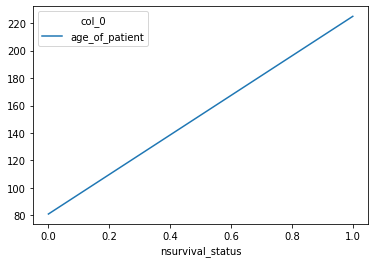

In [0]:
shaberman_age = pd.crosstab(haberman['nsurvival_status'], ['age_of_patient'])
shaberman_age.plot();

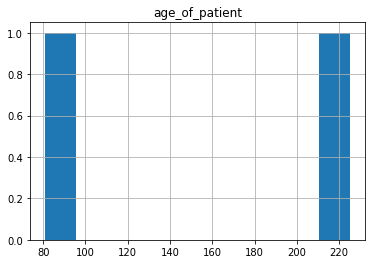

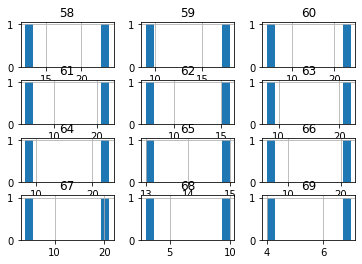

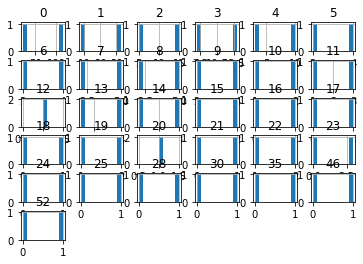

In [0]:
shaberman_age.hist(); shaberman_oy.hist(); shaberman_nd.hist();

In [0]:
pd.crosstab(haberman['age_of_patient'], haberman['operation_year'], normalize='index', margins=True)
pd.crosstab(haberman['age_of_patient'], haberman['operation_year'], normalize='columns', margins=True)

operation_year,58,59,60,61,62,63,64,65,66,67,68,69,All
age_of_patient,,,,,,,,,,,,,
30,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.032258,0.035714,0.000000,0.00,0.000000,0.000000,0.009804
31,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.00,0.000000,0.000000,0.006536
33,0.027778,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.006536
34,0.027778,0.037037,0.071429,0.038462,0.000000,0.000000,0.000000,0.000000,0.035714,0.04,0.000000,0.000000,0.022876
35,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.032258,0.000000,0.000000,0.00,0.000000,0.000000,0.006536
36,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.090909,0.006536
37,0.027778,0.037037,0.071429,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.019608
38,0.000000,0.037037,0.107143,0.000000,0.043478,0.000000,0.032258,0.000000,0.071429,0.04,0.000000,0.090909,0.032680
39,0.027778,0.037037,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.035714,0.04,0.000000,0.000000,0.019608


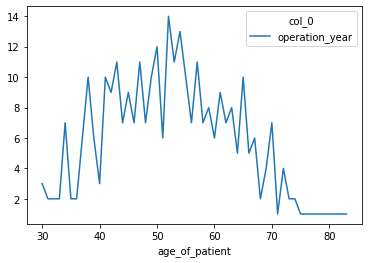

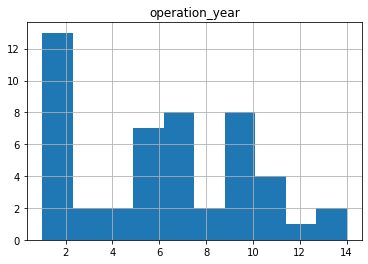

In [0]:
haberman_ao = pd.crosstab(haberman['age_of_patient'], ['operation_year'])
haberman_ao.plot(); haberman_ao.hist(); 

In [0]:
pd.crosstab(haberman['operation_year'], haberman['age_of_patient'], normalize='index', margins=True)
pd.crosstab(haberman['operation_year'], haberman['age_of_patient'], normalize='columns', margins=True)

age_of_patient,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,83,All
operation_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
58,0.000000,0.0,0.5,0.142857,0.0,0.0,0.166667,0.0,0.166667,0.666667,0.1,0.111111,0.090909,0.142857,0.000000,0.285714,0.090909,0.285714,0.0,0.083333,0.000000,0.000000,0.181818,0.076923,0.3,0.000000,0.000000,0.285714,0.000,0.000000,0.000000,0.285714,0.000,0.2,0.2,0.6,0.000000,0.0,0.00,0.285714,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.117647
59,0.000000,0.5,0.0,0.142857,0.0,0.0,0.166667,0.1,0.166667,0.000000,0.2,0.222222,0.090909,0.000000,0.111111,0.000000,0.000000,0.000000,0.0,0.166667,0.500000,0.071429,0.090909,0.076923,0.0,0.000000,0.000000,0.142857,0.000,0.166667,0.333333,0.142857,0.000,0.0,0.1,0.0,0.000000,0.0,0.00,0.142857,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.088235
60,0.000000,0.0,0.5,0.285714,0.0,0.5,0.333333,0.3,0.000000,0.000000,0.1,0.111111,0.090909,0.000000,0.111111,0.000000,0.090909,0.000000,0.1,0.000000,0.000000,0.142857,0.272727,0.153846,0.0,0.285714,0.000000,0.142857,0.125,0.000000,0.000000,0.000000,0.125,0.0,0.0,0.0,0.000000,0.0,0.25,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.091503
61,0.000000,0.0,0.0,0.142857,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.111111,0.000000,0.285714,0.000000,0.000000,0.090909,0.142857,0.2,0.250000,0.000000,0.071429,0.090909,0.000000,0.0,0.000000,0.181818,0.285714,0.000,0.333333,0.000000,0.000000,0.375,0.2,0.1,0.2,0.166667,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084967
62,0.333333,0.0,0.0,0.000000,0.0,0.0,0.000000,0.1,0.000000,0.000000,0.0,0.111111,0.000000,0.000000,0.000000,0.285714,0.090909,0.142857,0.2,0.000000,0.000000,0.214286,0.000000,0.153846,0.0,0.000000,0.181818,0.000000,0.125,0.000000,0.111111,0.142857,0.125,0.0,0.1,0.0,0.000000,0.0,0.00,0.000000,0.0,0.00,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.075163
63,0.000000,0.0,0.0,0.000000,0.5,0.0,0.333333,0.0,0.333333,0.000000,0.0,0.111111,0.181818,0.285714,0.000000,0.142857,0.181818,0.000000,0.2,0.166667,0.000000,0.071429,0.181818,0.076923,0.1,0.000000,0.090909,0.000000,0.125,0.000000,0.000000,0.000000,0.250,0.0,0.0,0.0,0.166667,0.0,0.00,0.142857,0.0,0.25,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.098039
64,0.333333,0.0,0.0,0.000000,0.5,0.0,0.000000,0.1,0.000000,0.000000,0.2,0.000000,0.363636,0.142857,0.111111,0.000000,0.000000,0.142857,0.1,0.166667,0.166667,0.071429,0.000000,0.000000,0.0,0.000000,0.363636,0.000000,0.500,0.166667,0.111111,0.000000,0.000,0.0,0.2,0.0,0.166667,0.0,0.00,0.000000,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101307
65,0.333333,0.5,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.333333,0.2,0.111111,0.090909,0.000000,0.111111,0.142857,0.090909,0.000000,0.0,0.083333,0.166667,0.071429,0.181818,0.153846,0.0,0.142857,0.000000,0.000000,0.000,0.166667,0.222222,0.142857,0.000,0.2,0.0,0.0,0.166667,0.0,0.25,0.000000,0.0,0.00,0.0,0.5,0.0,0.0,1.0,1.0,0.0,0.091503
66,0.000000,0.0,0.0,0.142857,0.0,0.0,0.000000,0.2,0.166667,0.000000,0.0,0.000000,0.090909,0.000000,0.111111,0.000000,0.181818,0.142857,0.1,0.083333,0.166667,0.071429,0.000000,0.076923,0.2,0.428571,0.000000,0.000000,0.000,0.000000,0.000000,0.285714,0.125,0.2,0.1,0.0,0.333333,0.0,0.25,0.142857,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.091503


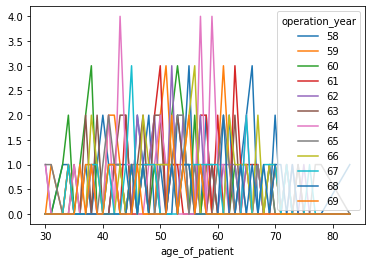

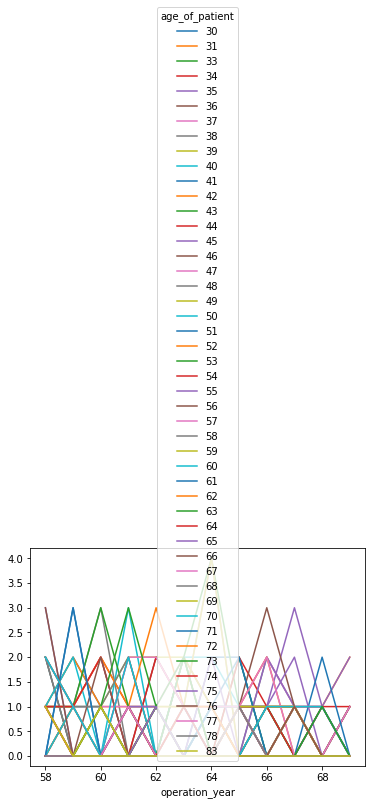

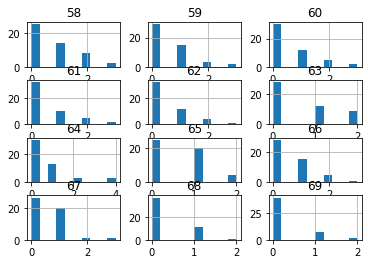

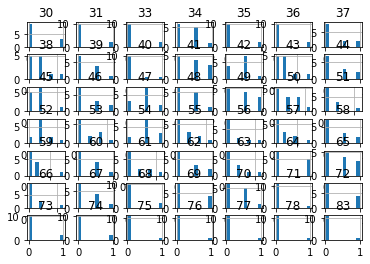

In [0]:
pd.crosstab(haberman['age_of_patient'], haberman['operation_year']).plot();
pd.crosstab(haberman['operation_year'], haberman['age_of_patient']).plot();
pd.crosstab(haberman['age_of_patient'], haberman['operation_year']).hist();
pd.crosstab(haberman['operation_year'], haberman['age_of_patient']).hist();

AttributeError: ignored

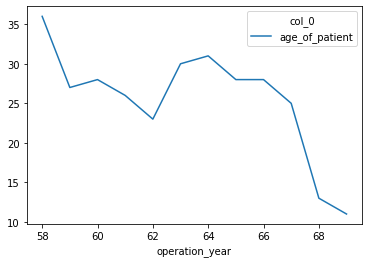

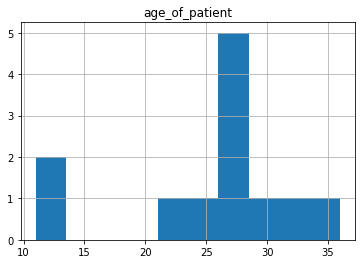

In [0]:
haberman_oa = pd.crosstab(haberman['operation_year'], ['age_of_patient'])
haberman_oa.plot(); haberman_oa.hist(); haberman_oa.bar();

In [0]:
haberman_ao = pd.crosstab(haberman['age_of_patient'], ['operation_year'])

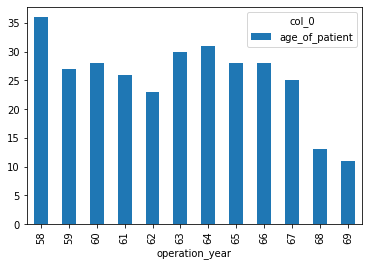

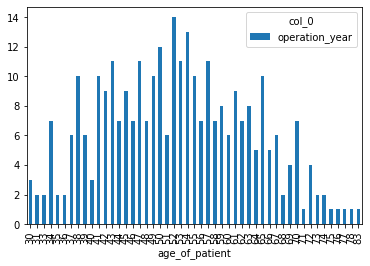

In [0]:
haberman_oa.plot(kind='bar'); haberman_ao.plot(kind='bar');

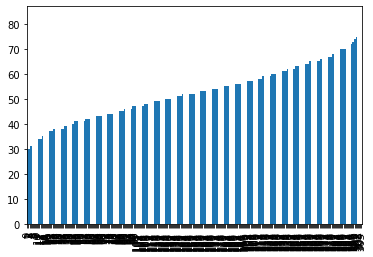

In [0]:
haberman['age_of_patient'].plot(kind='bar');

In [0]:
haberman.sample(5)

,age_of_patient,operation_year,number_of_positive_axillary_nodes_detected,survival_status,nsurvival_status
3,31,59,2,1,1
194,56,66,1,1,1
5,33,58,10,1,1
207,57,67,0,1,1
185,55,66,18,1,1


In [0]:
df = pd.DataFrame(haberman)
df

,age_of_patient,operation_year,number_of_positive_axillary_nodes_detected,survival_status,nsurvival_status
0,30,64,1,1,1
1,30,62,3,1,1
2,30,65,0,1,1
3,31,59,2,1,1
4,31,65,4,1,1
...,...,...,...,...,...
301,75,62,1,1,1
302,76,67,0,1,1
303,77,65,3,1,1
304,78,65,1,2,0


In [0]:
x = df['age_of_patient']
y = df['operation_year']

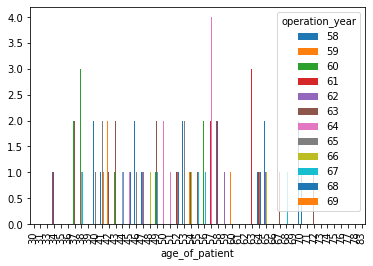

In [0]:
pd.crosstab(x,y).plot(kind='bar')

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

'*   positive is relationship is when operation year becomes more current less people die which means more people are surviving 

*   the negative relationship is that as a person gets older the surviaval rate gap lessen untill its below the death line. 

* cant tell educated guess is as you get older the more likly you are to get treatment.